<a href="https://colab.research.google.com/github/meghanamanoj24/SentimentalAnalysis/blob/main/SentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Sample Dataset:
                                                Text Sentiment
0      I love this product. It's amazing and useful!  Positive
1         This is the worst purchase I’ve ever made.  Negative
2  The product quality is excellent. Will buy again!  Positive
3      Terrible experience. Completely disappointed.  Negative
4  Satisfied with the purchase. Great value for m...  Positive
5     Not worth the price. Poor quality and service.  Negative


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


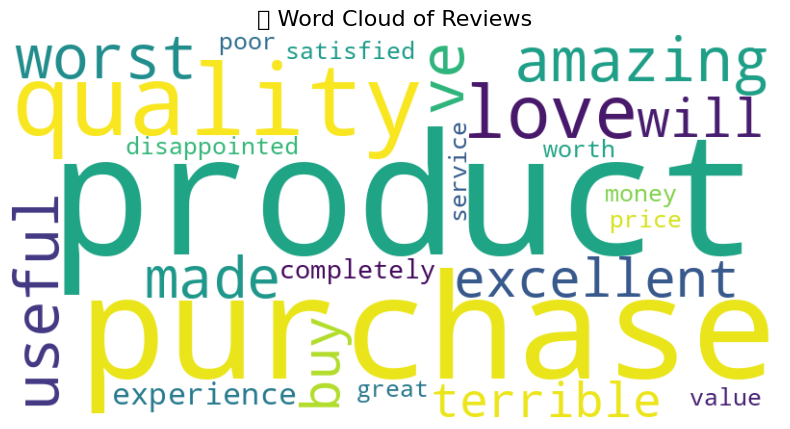


📊 === BoW Model Performance ===
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

📊 === TF-IDF Model Performance ===
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



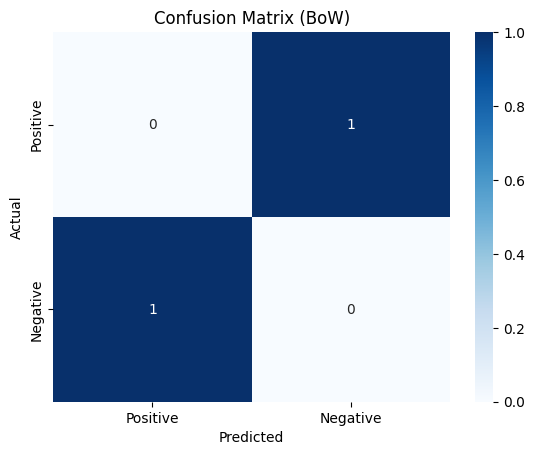

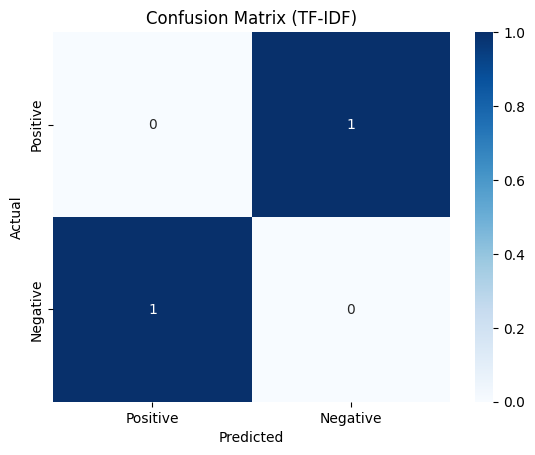

In [3]:
# 📌 Step 1: Install Required Library for Heatmap (if not already installed)
!pip install wordcloud seaborn

# 📌 Step 2: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# 📌 Step 3: Create Dataset
data = {
    'Text': [
        "I love this product. It's amazing and useful!",
        "This is the worst purchase I’ve ever made.",
        "The product quality is excellent. Will buy again!",
        "Terrible experience. Completely disappointed.",
        "Satisfied with the purchase. Great value for money.",
        "Not worth the price. Poor quality and service."
    ],
    'Sentiment': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative']
}
df = pd.DataFrame(data)
print("✅ Sample Dataset:")
print(df)

# 📌 Step 4: Preprocessing
df['Text'] = df['Text'].str.lower()

# 📌 Step 5: Generate Word Cloud
text_data = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# 📌 Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🔤 Word Cloud of Reviews", fontsize=16)
plt.show()

# 📌 Step 6: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.3, random_state=42)

# 📌 Step 7: Feature Extraction - BoW
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# 📌 Step 8: Feature Extraction - TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 📌 Step 9: Train and Predict - BoW
bow_model = LogisticRegression()
bow_model.fit(X_train_bow, y_train)
y_pred_bow = bow_model.predict(X_test_bow)

# 📌 Step 10: Train and Predict - TF-IDF
tfidf_model = LogisticRegression()
tfidf_model.fit(X_train_tfidf, y_train)
y_pred_tfidf = tfidf_model.predict(X_test_tfidf)

# 📌 Step 11: Evaluation
print("\n📊 === BoW Model Performance ===")
print(classification_report(y_test, y_pred_bow))

print("📊 === TF-IDF Model Performance ===")
print(classification_report(y_test, y_pred_tfidf))

# 📌 Step 12: Confusion Matrix Heatmaps
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["Positive", "Negative"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Positive", "Negative"],
                yticklabels=["Positive", "Negative"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# 🔥 Heatmap for BoW
plot_confusion_matrix(y_test, y_pred_bow, "Confusion Matrix (BoW)")

# 🔥 Heatmap for TF-IDF
plot_confusion_matrix(y_test, y_pred_tfidf, "Confusion Matrix (TF-IDF)")
